In [1]:
import pandas as pd

## Ticket Sales Analysis

In [9]:
#Import ticket sales data
tickets = pd.read_csv("/Users/jm/working/acl_spring_24_bulls2/data/ticket_sales_data_2223_2324.csv", 
                      names = [
                        'season_name', 'event_date', 'event_weekday', 'opponent_short',
                        'parent_ticket_categories', 'add_date', 'days_before_event',
                        'email', 'total_seats', 'seat_location', 'seat_level',
                        'arrival_time', 'attendee_email', 'attendee_zip_code', 'mobile_scan',
                        'scan_category'
                    ],
                    header = 0
                )



In [19]:
# Fix Date Data Types
tickets["event_date"] = pd.to_datetime(tickets['event_date'], format = "%d-%b-%y")
tickets["add_date"] = pd.to_datetime(tickets['add_date'], format = "%d-%b-%y")
tickets["arrival_time"] = pd.to_datetime(tickets['arrival_time'], format = "%m/%d/%y %H:%M")

,season_name,event_date,event_weekday,opponent_short,parent_ticket_categories,add_date,days_before_event,email,total_seats,seat_location,seat_level,arrival_time,attendee_email,attendee_zip_code,mobile_scan,scan_category
0,2022-2023 Chicago Bulls,2022-10-04,Tue,Pelicans,Group,2022-09-27,7,frooogpop@outlook.com,1,100 Level End,Lower Level,NaT,NaN,NaN,NaN,Other
1,2022-2023 Chicago Bulls,2022-10-04,Tue,Pelicans,Group,2022-09-27,7,frooogpop@outlook.com,2,100 Level Center,Lower Level,2022-10-04 19:07:00,dman21968@yahoo.com,23060,1.0,Web Browser
2,2022-2023 Chicago Bulls,2022-10-04,Tue,Pelicans,Group,2022-09-27,7,frooogpop@outlook.com,2,100 Level Center,Lower Level,2022-10-04 19:40:00,jazziebae85@gmail.com,60428,1.0,Web Browser
3,2022-2023 Chicago Bulls,2022-10-04,Tue,Pelicans,Group,2022-09-27,7,frooogpop@outlook.com,2,100 Level Center,Lower Level,2022-10-04 19:42:00,mohamedibrahim94@live.com,K1G 5Z5,1.0,Web Browser
4,2022-2023 Chicago Bulls,2022-10-04,Tue,Pelicans,Group,2022-09-27,7,frooogpop@outlook.com,2,100 Level Center,Lower Level,2022-10-04 19:47:00,carlosvazquez16@yahoo.com,60411,1.0,Web Browser


In [37]:
tickets.season_name.unique()

array(['2022-2023 Chicago Bulls', '2023-2024 Chicago Bulls'], dtype=object)

In [30]:
tickets.parent_ticket_categories.unique()
season_tickets = tickets[tickets["parent_ticket_categories"]=="Season"]

In [36]:
sum(season_tickets.email.isnull())

1178

In [31]:
#U
len(tickets)

570265

In [32]:
len(season_tickets)

270086

array([[<Axes: title={'center': 'attendee_zip_code'}>]], dtype=object)

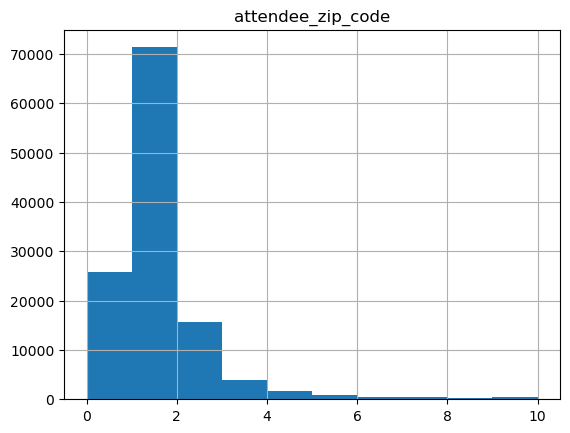

In [50]:
tickets.groupby("email").agg({"attendee_zip_code":"count"}).hist(range = (0,10))

## Game Data Ingestion

In [71]:
s23 = pd.read_csv("/Users/jm/working/acl_spring_24_bulls2/data/bulls2223_season.csv")
s24 = pd.read_csv("/Users/jm/working/acl_spring_24_bulls2/data/bulls2324_season.csv")

In [72]:
s23['season'] = "2022-2023 Chicago Bulls"
s24['season'] = "2023-2024 Chicago Bulls"

In [77]:
s23.dtypes

G                    int64
date                object
start_et    datetime64[ns]
away                 int64
Opponent            object
outcome             object
overtime            object
pts                  int64
pts_all              int64
W                    int64
L                    int64
Streak              object
Notes               object
season              object
dtype: object

In [78]:
def convert_time(time_str):
    return time_str.replace('p', ' PM').replace('a', ' AM')

s23["start_et"] = s23['date'] + ' ' + s23['start_et'].apply(convert_time)
s23["start_et"] = pd.to_datetime(s23['start_et'], format = "%a %b %d %Y %I:%M %p")
s23['date'] = s23['start_et'].dt.normalize()



ValueError: value must be an integer, received <class 'str'> for year

In [65]:
s23["event_date"] = pd.to_datetime(s23['date'], format = "%a %b %d %Y")
s24["event_date"] = pd.to_datetime(s24['date'], format = "%a %b %d %Y")

In [74]:
s23.head(20)

,G,date,start_et,away,Opponent,outcome,overtime,pts,pts_all,W,L,Streak,Notes,season
0,1,Wed Oct 19 2022,2022-10-19 19:30:00,1,Miami Heat,W,0,116,108,1,0,W 1,NaN,2022-2023 Chicago Bulls
1,2,Fri Oct 21 2022,2022-10-21 19:00:00,1,Washington Wizards,L,0,100,102,1,1,L 1,NaN,2022-2023 Chicago Bulls
2,3,Sat Oct 22 2022,2022-10-22 20:00:00,0,Cleveland Cavaliers,L,0,96,128,1,2,L 2,NaN,2022-2023 Chicago Bulls
3,4,Mon Oct 24 2022,2022-10-24 20:00:00,0,Boston Celtics,W,0,120,102,2,2,W 1,NaN,2022-2023 Chicago Bulls
4,5,Wed Oct 26 2022,2022-10-26 20:00:00,0,Indiana Pacers,W,0,124,109,3,2,W 2,NaN,2022-2023 Chicago Bulls
5,6,Fri Oct 28 2022,2022-10-28 20:30:00,1,San Antonio Spurs,L,0,124,129,3,3,L 1,NaN,2022-2023 Chicago Bulls
6,7,Sat Oct 29 2022,2022-10-29 20:00:00,0,Philadelphia 76ers,L,0,109,114,3,4,L 2,NaN,2022-2023 Chicago Bulls
7,8,Tue Nov 1 2022,2022-11-01 19:30:00,1,Brooklyn Nets,W,0,108,99,4,4,W 1,NaN,2022-2023 Chicago Bulls
8,9,Wed Nov 2 2022,2022-11-02 20:00:00,0,Charlotte Hornets,W,0,106,88,5,4,W 2,NaN,2022-2023 Chicago Bulls
9,10,Fri Nov 4 2022,2022-11-04 19:30:00,1,Boston Celtics,L,0,119,123,5,5,L 1,NaN,2022-2023 Chicago Bulls


## Email Data Analysis

In [29]:
#Import E-Mail Data
kbyg_emails = pd.read_csv("/Users/jm/working/acl_spring_24_bulls2/data/kbyg_clickthrough_data_2223_2324.csv", 
                      names = [
                          'email', 'clickthrough_link', 'email_clickthrough_date_time',
                          'email_name', 'total_clickthroughs', 'email_send_date',
                          'unique_clickthroughs', 'clickthrough_link_count', 'season'
                      ]
       )
postgame_emails = pd.read_csv("/Users/jm/working/acl_spring_24_bulls2/data/Postgame_Email_Clickthrough_2223_and_2324_seasons.csv", 
                      names = [
                          'email', 'clickthrough_link', 'email_clickthrough_date_time',
                          'email_name', 'total_clickthroughs', 'email_send_date',
                          'unique_clickthroughs', 'clickthrough_link_count', 'season'
                      ]
       )

In [26]:
kbyg_emails.columns

Index(['Email Address', 'Clickthrough Link', 'Email Clickthrough Date/Time',
       'Email Name', 'Total Clickthroughs', 'Email Send Date',
       'Unique Clickthroughs', 'Clickthrough Link Count', 'Season'],
      dtype='object')

In [21]:
# How many unique emails do we have here?
len(kbyg_emails.email.unique())

9089

In [22]:
# How many unique emails do we have here?
len(postgame_emails.email.unique())

17638

In [10]:
#Import LivaA Data
liva_2223 = pd.read_csv("/Users/jm/working/acl_spring_24_bulls2/data/liveA_2223_season_ticket_holders.csv")
liva_2324 = pd.read_csv("/Users/jm/working/acl_spring_24_bulls2/data/liveA_2324_season_ticket_holders.csv")

/var/folders/3q/d621fwvs43q2f6s93g46njd00000gn/T/ipykernel_1199/142937810.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  liva_2324 = pd.read_csv("/Users/jm/working/acl_spring_24_bulls2/data/liveA_2324_season_ticket_holders.csv")


In [11]:
kbyg_emails.head()

,Email Address,Clickthrough Link,Email Clickthrough Date/Time,Email Name,Total Clickthroughs,Email Send Date,Unique Clickthroughs,Clickthrough Link Count,Season
0,404345@colum.edu,https://www.nba.com/bulls/healthandsafety,10/26/2023 13:28,2023_1025_CB_Digital_KBYG_OKC,1,10/25/2023 17:00,1,1,2324
1,a.aroonlap@gmail.com,https://www.nba.com/bulls/iog,10/25/2023 18:44,2023_1025_CB_Digital_KBYG_OKC,1,10/25/2023 17:00,1,1,2324
2,aarias@viveseguros.mx,https://www.nba.com/bulls/news/chicago-bulls-m...,10/25/2023 17:48,2023_1025_CB_Digital_KBYG_OKC,1,10/25/2023 17:00,1,1,2324
3,adam.zerella@proton.me,http://response.bulls.com/subscription-center,10/25/2023 17:41,2023_1025_CB_Digital_KBYG_OKC,1,10/25/2023 17:00,1,1,2324
4,agarcia2639@gmail.com,https://chicagobullsraffle.5050central.com/Hom...,10/26/2023 8:54,2023_1025_CB_Digital_KBYG_OKC,1,10/25/2023 17:00,1,1,2324
